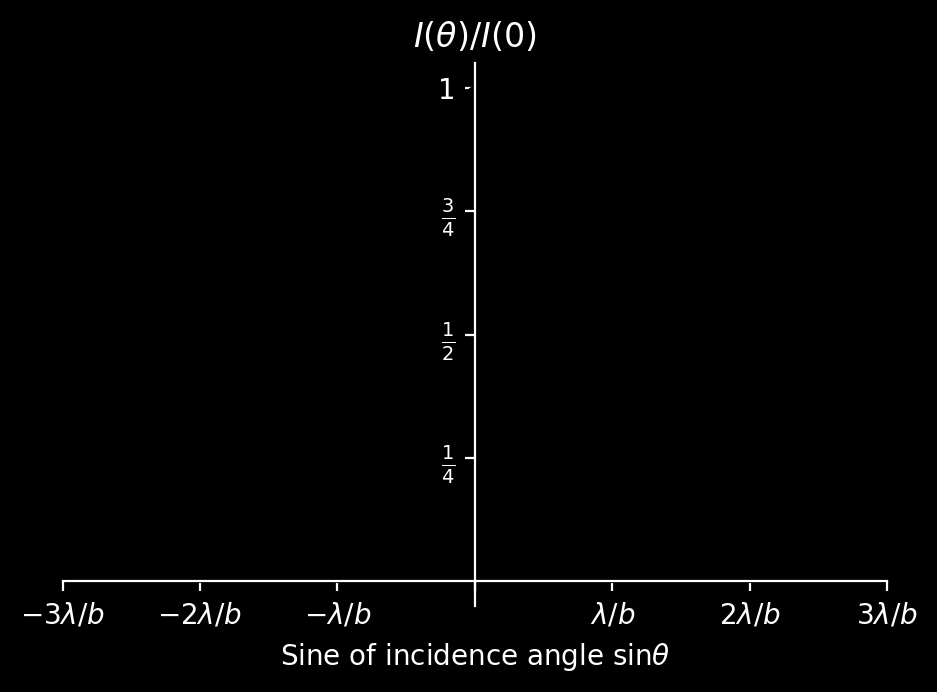

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Model input parameters:
w = 6.238e-7*1e7 # light wavelength [micron]
a = 1.55838332e-06*1e7 # slit width [micron]
d = a*3 # slit spacing [micron]
N = 1 # number of slits

if N > 1 and d < a:
    raise ValueError("Invalid parameters: slit spacing must be larger than slit width")

# model diffraction up to this angle [radians]
max_angle = np.deg2rad(100)
# theta - angle of incidence
theta = np.linspace(-max_angle, max_angle, 10000)
#theta = np.linspace(-np.pi/50, np.pi/50, 10000)

def slit_intensity(a, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on a slit.
    a: slit width [micron]
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    # diffraction pattern from one slit
    alpha = np.pi * a / w * np.sin(theta)
    # 
    I = (np.sin(alpha) / alpha)**2
    # treat singularity at alpha == 0 specially:
    ii = abs(alpha) < 1e-5
    if any(ii):
        I[ii] = 1.0
    return I

def grating_interference(d, N, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on an array of delta-function slits.
    d: slit spacing, centre-to-centre [micron]
    N: number of slits
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    # diffraction pattern from an array of slits
    beta = np.pi * d / w * np.sin(theta)
    I = (np.sin(N*beta) / N / np.sin(beta))**2
    # treat singularities at sin(beta) == 0 specially:
    ii = abs(np.sin(beta)) < 1e-5
    if any(ii):
        I[ii] = N**2
    return I

def grating_intensity(a, d, N, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on an array of slits.
    a: slit width [micron]
    d: slit spacing, centre-to-centre [micron]
    N: number of slits
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    return slit_intensity(a, w, theta) * grating_interference(d, N, w, theta)
    
# Plot the interference pattern
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r'Sine of incidence angle $\sin\theta$')
if N > 1:
    ax.plot(np.sin(theta), slit_intensity(a, w, theta), '--', label='single-slit envelope', color='k', linewidth=1)
ax.plot(np.sin(theta), grating_intensity(a, d, N, w, theta), '-', label='double-slit pattern', color='k', linewidth=1.2)
if N > 1:
    ax.legend()
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#ax.set_xlim(-2, 2)
ax.set_yticks([0.25,0.5,0.75,1])
ax.set_yticklabels([r"$\frac{1}{4}$", r"$\frac{1}{2}$", r"$\frac{3}{4}$", "1"])
p=w/a
ax.set_xticks([-3*p, -2*p, -p, 0, p, 2*p, 3*p])
ax.set_xticklabels([r'$-3\lambda/b$', r'$-2\lambda/b$', r'$-\lambda/b$', "", r'$\lambda/b$', r'$2\lambda/b$', r'$3\lambda/b$'])
plt.title(r'$I(\theta)/I(0)$')
plt.tight_layout()
plt.show()

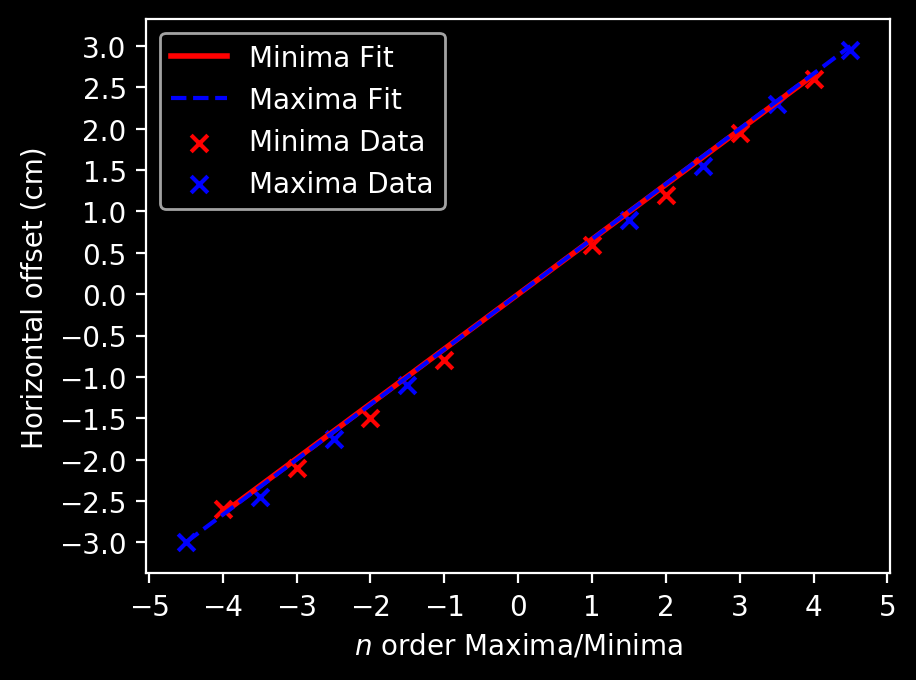

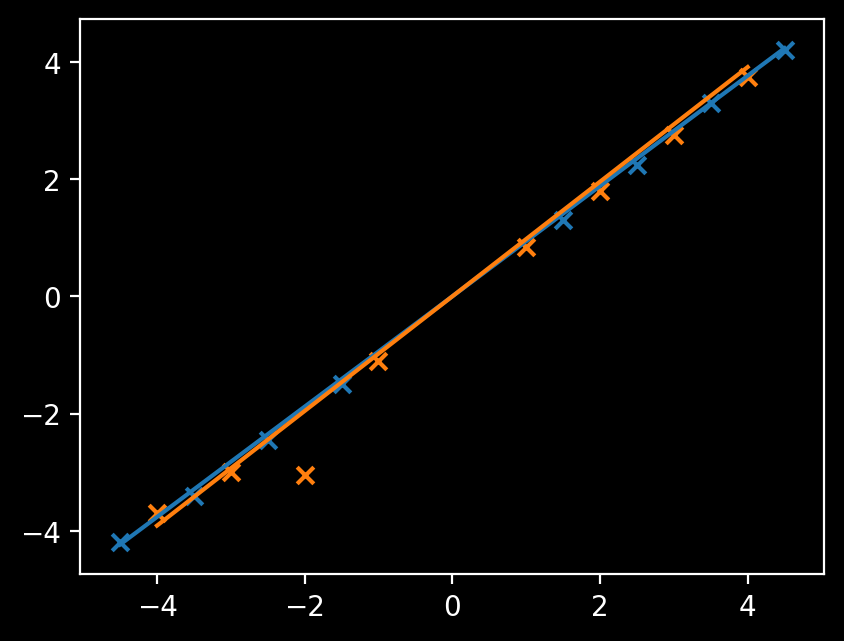

In [2]:
from scipy.optimize import curve_fit
from scipy.stats import chi2
import csv

_w = 6.238e-5
_l = 166
_dl = 1
_dx = 0.05

def minima_func(n, *vars):
    a, = vars
    return _l*( (_w/a)*n)

def maxima_func(n, *vars):
    a, = vars
    return _l*( (_w/a)*(n))

# Datasets
s      = np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])

n      = np.array([-4,-3,-2,-1,1,2,3,4])

a3_min = np.array([-6.3,-4.9,-3.3,-1.7,1.5,3.15,4.8,6.5])
a4_min = np.array([-5.5,-4.35,-2.9,-1.55,1.3,2.7,4.2,5.6])
a5_min = np.array([-4.7,-3.7,-2.5,-1.3,1.1,2.3,3.5,4.7])
b1_min = np.array([-3.7,-3,-3.05,-1.1,0.85,1.8,2.75,3.75])
b2_min = np.array([-3.35,-2.7,-1.85,-1,0.75,1.6,2.5,3.3])
b3_min = np.array([-3,-2.4,-1.6,-0.9,0.7,1.1,2.2,3])
b4_min = np.array([-2.6,-2.1,-1.5,-0.8,0.6,1.2,1.95,2.6])
b5_min = np.array([-2.4,-1.95,-1.35,-0.75,0.55,1.1,1.7,2.35])

n_max  = np.array([-4.5,-3.5,-2.5,-1.5,1.5,2.5,3.5,4.5])

a3_max = np.array([-7.3,-5.6,-4,-2.4,2.3,4,5.7,7.4])
a4_max = np.array([-6.2,-4.9,-3.5,-2.1,2,3.4,4.9,6.4])
a5_max = np.array([-5.3,-4.2,-3,-1.8,1.7,2.9,4.1,5.4])
b1_max = np.array([-4.2,-3.4,-2.45,-1.5,1.3,2.25,3.3,4.2])
b2_max = np.array([-3.85,-3.1,-2.2,-1.35,1.2,2.05,2.9,3.8])
b3_max = np.array([-3.4,-2.75,-2,-1.2,1.05,1.8,2.55,3.4])
b4_max = np.array([-3,-2.45,-1.75,-1.1,0.9,1.55,2.3,2.95])
b5_max = np.array([-2.8,-2.2,-1.6,-1,0.8,1.45,2.05,2.65])

minima = [a3_min, a4_min, a5_min, b1_min, b2_min, b3_min, b4_min, b5_min]
maxima = [a3_max, a4_max, a5_max, b1_max, b2_max, b3_max, b4_max, b5_max]

min_params = []
max_params = []
min_err    = []
max_err    = []
min_covs   = []
max_covs   = []
min_pval   = []
max_pval   = []

for m in minima:
    p0 = np.array([1e-4])
    parameters, covariance = curve_fit(minima_func, n, m, p0, s, absolute_sigma=True)
    min_params.append(parameters)
    min_covs.append(covariance)
    chi_sq_min = sum(((m-minima_func(n, parameters))/s)**2)
    #ndof = len(n)-len(p0)
    #p_val = chi2.sf(chi_sq_min, df=ndof)
    min_pval.append(chi_sq_min/7)

for m in maxima:
    p0 = np.array([1e-4])
    parameters, covariance = curve_fit(minima_func, n_max, m, p0, s, absolute_sigma=True)
    max_params.append(parameters)
    max_covs.append(covariance)
    chi_sq_min = sum(((m-maxima_func(n_max, parameters))/s)**2)
    #ndof = len(n_max)-len(p0)
    #p_val = chi2.sf(chi_sq_min, df=ndof)
    max_pval.append(chi_sq_min/7)

fig = plt.figure()
ax = fig.add_subplot()
#for i in range(0, 8):
#    ax.plot(n, minima_func(n, min_params[i]))
#    ax.scatter(n, minima[i], marker='x')

ax.plot(n, minima_func(n, min_params[6]), color='r', linewidth=2, label="Minima Fit")
ax.scatter(n, minima[6], marker='x', color='r', label="Minima Data")
ax.plot(n_max, maxima_func(n_max, max_params[6]), 'b--', label="Maxima Fit")
ax.scatter(n_max, maxima[6], marker='x', color='b', label="Maxima Data")
ax.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_yticks([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3])
ax.set_xlabel(r"$n$ order Maxima/Minima")
ax.set_ylabel(r"Horizontal offset (cm)")

ax.legend()

with open('ss.csv', mode='w') as ss_file:
    csv_writer = csv.writer(ss_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(['Set', 'max_b', 'min_b', 'max_db', 'min_db', 'avgb', 'avgdb', 'chisq'])
    for i in range(0, 8):
        _max_b = round(max_params[i][0], 5)
        _min_b = round(min_params[i][0], 5)
        _max_db = round(max_covs[i][0][0], 12)
        _min_db = round(min_covs[i][0][0], 12)
        _avg_b = (_max_b+_min_b)/2
        _avg_db = (_max_db+_min_db)/2
        _chisq = round(((min_pval[i]+max_pval[i])/2)/7, 5)
        csv_writer.writerow([i, _max_b, _min_b, _max_db, _min_db, _avg_b, _avg_db, _chisq])


fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.plot(n_max, maxima_func(n_max, max_params[3]))
ax1.scatter(n_max, maxima[3], marker='x')
ax1.plot(n, minima_func(n, min_params[3]))
ax1.scatter(n, minima[3], marker='x')

[0.01558383]


FileNotFoundError: [Errno 2] No such file or directory: 'bandw.png'

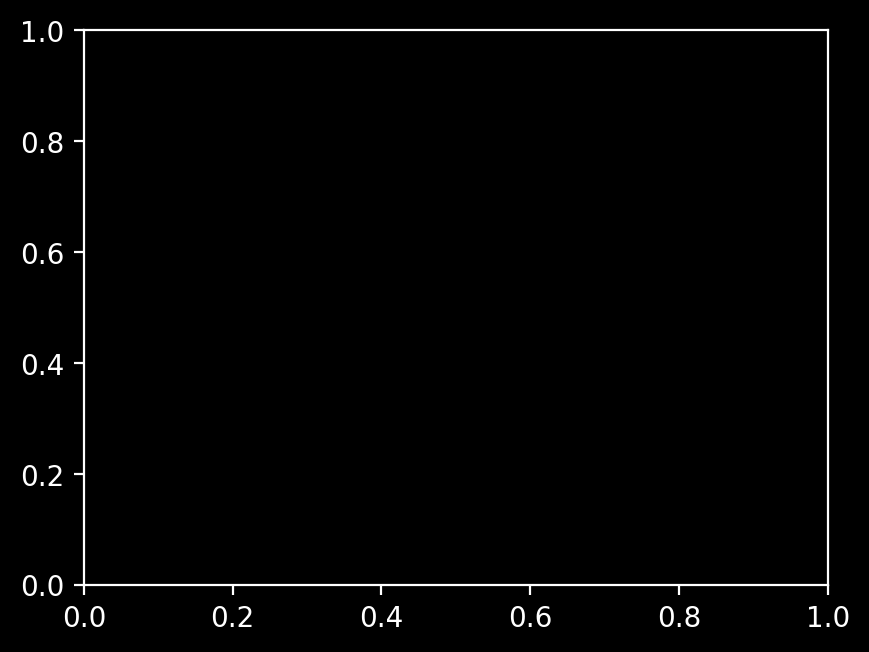

In [3]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

def single_slit(a, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on a slit.
    a: slit width [micron]
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    # diffraction pattern from one slit
    alpha = np.pi * a / _w * np.sin(theta)
    # 
    I = (np.sin(alpha) / alpha)**2
    # treat singularity at alpha == 0 specially:
    ii = abs(alpha) < 1e-5
    if any(ii):
        I[ii] = 1.0
    return I

fig9 = plt.figure()
ax9 = fig9.add_subplot()
max_angle = np.deg2rad(90)
# theta - angle of incidence
theta = np.linspace(-np.pi/2,np.pi/2, 10000)

a9 = (min_params[6]+max_params[6])/2
print(a9)
#arr_lena = mpimg.imread('bandw.png')
#imagebox = OffsetImage(arr_lena, zoom=0.5)
#ab = AnnotationBbox(imagebox, (0, 0.4))
#ax9.add_artist(ab)
img = plt.imread('bandw.png')
ax9.imshow(img, extent=[-1.45, 1.5, -0.4, -0.2])

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax9.spines['left'].set_position(('data', 0.0))
ax9.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax9.spines['right'].set_color('none')
ax9.spines['top'].set_color('none')
ax9.spines['left'].set_color('none')

# Show ticks in the left and lower axes only
ax9.xaxis.set_ticks_position('bottom')
ax9.yaxis.set_ticks_position('left')
ax9.yaxis.set_visible(False)

ax9.plot(np.sin(theta), single_slit(a9, theta), '-', label='double-slit pattern', color='k', linewidth=1.2)
ax9.set_xlim(-1, 1)
ax9.set_ylim(-0.5, 1.1)

[[9.33814958]]
[[9.33814967]]
[[9.3381495]]
[[9.33814954]]
[[9.33814969]]
[[13.61154031]]
[[13.61154015]]
[[13.6115404]]
[[13.61153998]]
[[13.61154004]]
[array([103.24908569]), array([123.28755954]), array([114.45704567]), array([153.5150881]), array([125.32537054])]
[array([104.85247955]), array([126.28898657]), array([120.69685424]), array([146.32746039]), array([128.15303057])]
[array([[9.33814958]]), array([[9.33814967]]), array([[9.3381495]]), array([[9.33814954]]), array([[9.33814969]])]


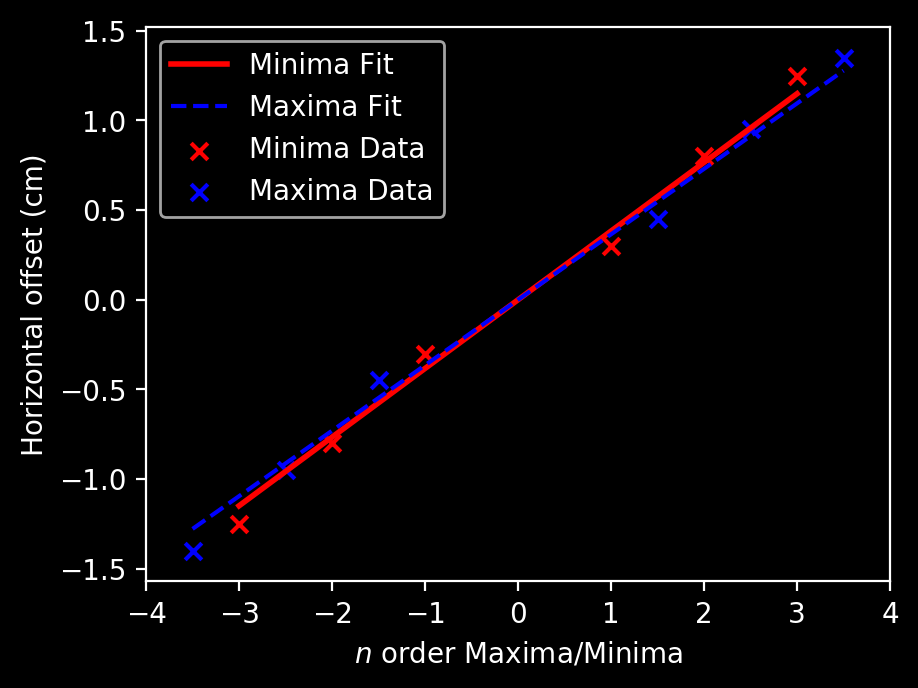

In [5]:
_a = 0.0250

def ds_func(n, *vars):
    l, = vars
    return l*( (_w/_a)*(n+1/2))

def plt_func(n, *vars):
    l, = vars
    return l*( (_w/_a)*(n))

#datasets
n_ds_max= np.array([-3.5,-2.5,-1.5,1.5,2.5,3.5])
n_ds_min= np.array([-3,-2,-1,1,2,3])
s_ds    = np.array([0.05,0.05,0.05,0.05,0.05,0.05])
ds1_max = np.array([-0.95,-0.65,-0.3,0.35,0.7,1])
ds1_min = np.array([-0.85,-0.5,-0.15,0.2,0.55,0.85])
ds2_max = np.array([-1.15,-0.75,-0.35,0.45,0.85,1.2])
ds2_min = np.array([-1,-0.55,-0.15,0.25,0.65,1.05])
ds3_max = np.array([-1.1,-0.9,-0.4,0.4,0.75,1.1])
ds3_min = np.array([-1,-0.6,-0.2,0.15,0.55,0.95])
ds4_max = np.array([-1.4,-0.95,-0.45,0.45,0.95,1.35])
#ds4_min = np.array([-1.2,-0.7,-0.25,0.2,0.75,1.2])
ds4_min = np.array([-1.25,-0.8,-0.3,0.3,0.8,1.25])
ds5_max = np.array([-1.2,-0.8,-0.4,0.4,0.85,1.2])
ds5_min = np.array([-1.05,-0.6,-0.2,0.2,0.65,1.05])

ds_maxima = [ds1_max, ds2_max, ds3_max, ds4_max, ds5_max]
ds_minima = [ds1_min, ds2_min, ds3_min, ds4_min, ds5_min]

max_par = []
min_par = []
max_cov = []
min_cov = []
max_chi = []
min_chi = []

for m in ds_maxima:
    p0 = np.array([1])
    parameters, covariance = curve_fit(ds_func, n_ds_max, m, p0, s_ds, absolute_sigma=True)
    max_par.append(parameters)
    max_cov.append(covariance)
    print(covariance)
    chi_sq_min = sum(((m-ds_func(n_ds_max, parameters))/s_ds)**2)
    #ndof = len(n)-len(p0)
    #p_val = chi2.sf(chi_sq_min, df=ndof)
    max_chi.append(chi_sq_min/5)

for m in ds_minima:
    p0 = np.array([1])
    parameters, covariance = curve_fit(ds_func, n_ds_min, m, p0, s_ds, absolute_sigma=True)
    min_par.append(parameters)
    min_cov.append(covariance)
    print(covariance)
    chi_sq_min = sum(((m-ds_func(n_ds_min, parameters))/s_ds)**2)
    #ndof = len(n)-len(p0)
    #p_val = chi2.sf(chi_sq_min, df=ndof)
    min_chi.append(chi_sq_min/5)

print(min_par)
print(max_par)

with open('ds.csv', mode='w') as ds_file:
    csv_writer = csv.writer(ds_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(['Set', 'max_l', 'min_l', 'max_dl', 'min_dl', 'avgl', 'avgdl', 'chisq'])
    for i in range(0, 5):
        _max_l = round(max_par[i][0], 3)
        _min_l = round(min_par[i][0], 3)
        _max_dl = round(max_cov[i][0][0], 3)
        _min_dl = round(min_cov[i][0][0], 3)
        _avg_l = (_max_l+_min_l)/2
        _avg_dl = (_max_dl+_min_dl)/2
        _chisq = round(((min_chi[i]+max_chi[i])/2)/5, 5)
        csv_writer.writerow([i, _max_l, _min_l, _max_dl, _min_dl, _avg_l, _avg_dl, _chisq])

fig2 = plt.figure()
ax2 = fig2.add_subplot()
#for i in range(0, 5):    
#    ax2.plot(n_ds_max, plt_func(n_ds_max, max_par[i]))
#    ax2.scatter(n_ds_max, ds_maxima[i], marker='x')

ax2.plot(n_ds_min, plt_func(n_ds_min, min_par[3]), color='r', linewidth=2, label="Minima Fit")
ax2.scatter(n_ds_min, ds_minima[3], marker='x', color='r', label="Minima Data")
ax2.plot(n_ds_max, plt_func(n_ds_max, max_par[3]), 'b--', label="Maxima Fit")
ax2.scatter(n_ds_max, ds_maxima[3], marker='x', color='b', label="Maxima Data")
ax2.set_xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
ax2.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])
ax2.set_xlabel(r"$n$ order Maxima/Minima")
ax2.set_ylabel(r"Horizontal offset (cm)")

print(max_cov)

ax2.legend()

In [6]:
print("test")

test
